In [2]:
# !usr/bin/python
# -*- encoding: utf-8 -*-
# Project: Transformer
# Author: Tracy Tao
# Date: 2022/04/19
import torch
import math
import pandas as pd
from torch import nn
from d2l import torch as d2l

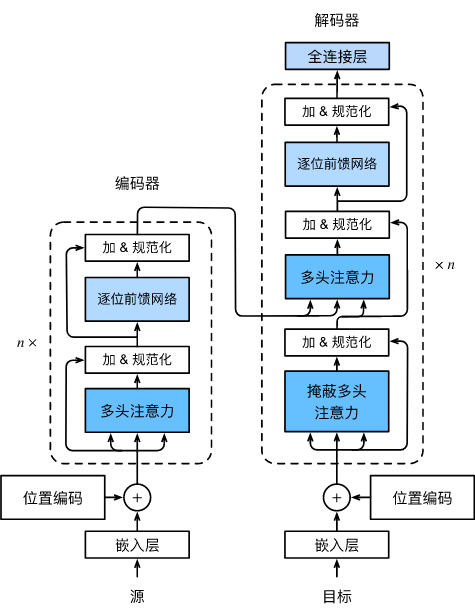

In [3]:
class PositionWiseFFN(nn.Module):
    '''
    基于位置的前馈网络
    '''
    def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs, **kwargs):
        super(PositionWiseFFN, self).__init__(**kwargs)
        self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_outputs)
    
    def forward(self, X):
        return self.dense2(self.relu(self.dense1(X)))

In [4]:
ffn = PositionWiseFFN(4, 4, 8)
ffn.eval()

PositionWiseFFN(
  (dense1): Linear(in_features=4, out_features=4, bias=True)
  (relu): ReLU()
  (dense2): Linear(in_features=4, out_features=8, bias=True)
)

In [5]:
ffn(torch.ones((2, 3, 4)))[0]

tensor([[ 0.4717, -0.0588, -0.3895, -0.5569,  0.1180, -0.1414, -0.1600, -0.1386],
        [ 0.4717, -0.0588, -0.3895, -0.5569,  0.1180, -0.1414, -0.1600, -0.1386],
        [ 0.4717, -0.0588, -0.3895, -0.5569,  0.1180, -0.1414, -0.1600, -0.1386]],
       grad_fn=<SelectBackward0>)

In [9]:
# 残差连接和层规范化来实现AddNorm类。暂退法也被作为正则化方法使用。
class AddNorm(nn.Module):
    def __init__(self, normalized_shape, dropout, **kwargs):
        super(AddNorm, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)
        self.ln = nn.LayerNorm(normalized_shape)
    
    def forward(self, X, Y):
        return self.ln(self.dropout(Y) + X)

In [10]:
add_norm = AddNorm([3, 4], 0.5)
add_norm.eval()

AddNorm(
  (dropout): Dropout(p=0.5, inplace=False)
  (ln): LayerNorm((3, 4), eps=1e-05, elementwise_affine=True)
)